In [5]:
#Importing the packages needed for do the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

%matplotlib inline

In [ ]:
# please use SKLEARN version 1.0.2

# Loading the data and some data exploration

In [6]:
TCSC = pd.read_excel('./Data/DJ_data_for_repo.xlsx')

/Users/wenbinli/Documents/Jin crystal/perovskite_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/wenbinli/Documents/Jin crystal/perovskite_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/wenbinli/Documents/Jin crystal/perovskite_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/wenbinli/Documents/Jin crystal/perovskite_ml/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarni

<Figure size 1200x800 with 0 Axes>

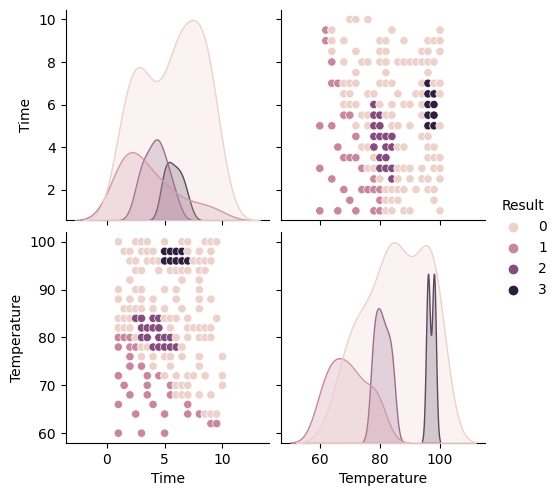

In [7]:
fig = plt.figure(figsize = (12,8))
sns.pairplot(data = TCSC, hue = 'Result')

In [8]:
val = [];
for i in range(0,4):
    val.append(TCSC[(TCSC['Result']== i )].count()["Time"])

Text(0, 0.5, 'Count (#)')

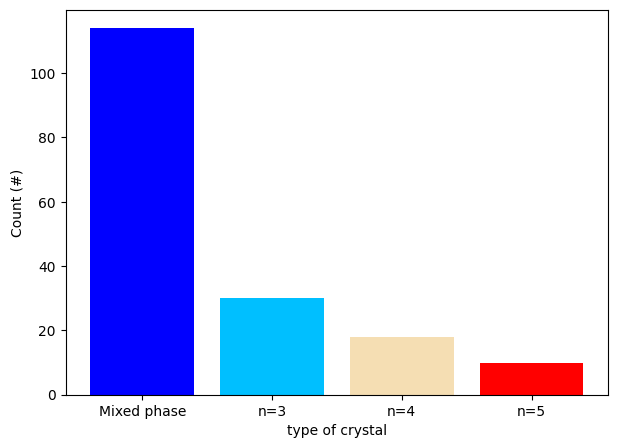

In [9]:
bars = ('Mixed phase', 'n=3', 'n=4', 'n=5')

fig = plt.figure(figsize=(7,5))
plt.bar(np.arange(4), val, color = ['blue', 'deepskyblue', 'wheat', 'red'])
plt.xticks(np.arange(4), bars)
plt.rc('font', size=16)
plt.xlabel('type of crystal')
plt.ylabel('Count (#)')

In [10]:
X = TCSC.drop('Result', axis = 1)
y = TCSC['Result']

# Standard ML pipeline for 1 time fit

In [11]:

SS = StandardScaler()

In [12]:
# Train and Test are 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [13]:
X_train = SS.fit_transform(X_train, y_train)

/Users/wenbinli/Documents/Jin crystal/perovskite_ml/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/wenbinli/Documents/Jin crystal/perovskite_ml/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [14]:
svc = SVC(kernel='rbf',decision_function_shape='ovo')

In [18]:
svc.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

In [19]:
predict = svc.predict(X_test)

/Users/wenbinli/Documents/Jin crystal/perovskite_ml/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/wenbinli/Documents/Jin crystal/perovskite_ml/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        35
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         2

    accuracy                           0.67        52
   macro avg       0.17      0.25      0.20        52
weighted avg       0.45      0.67      0.54        52



/Users/wenbinli/Documents/Jin crystal/perovskite_ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wenbinli/Documents/Jin crystal/perovskite_ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wenbinli/Documents/Jin crystal/perovskite_ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

Grid Search for hyperparameter tuning

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {'C': np.logspace(-3,5,70), 'gamma' :np.logspace(-3,5,70)}
grid = GridSearchCV(SVC(kernel='rbf',decision_function_shape='ovo'),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 4900 candidates, totalling 24500 fits
[CV 1/5] END ..............C=0.001, gamma=0.001;, score=0.625 total time=   0.0s
[CV 2/5] END ..............C=0.001, gamma=0.001;, score=0.667 total time=   0.0s
[CV 3/5] END ..............C=0.001, gamma=0.001;, score=0.667 total time=   0.0s
[CV 4/5] END ..............C=0.001, gamma=0.001;, score=0.667 total time=   0.0s
[CV 5/5] END ..............C=0.001, gamma=0.001;, score=0.667 total time=   0.0s
[CV 1/5] END C=0.001, gamma=0.0013059965479060534;, score=0.625 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.0013059965479060534;, score=0.667 total time=   0.0s
[CV 3/5] END C=0.001, gamma=0.0013059965479060534;, score=0.667 total time=   0.0s
[CV 4/5] END C=0.001, gamma=0.0013059965479060534;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.001, gamma=0.0013059965479060534;, score=0.667 total time=   0.0s
[CV 1/5] END C=0.001, gamma=0.0017056269831425286;, score=0.625 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.0

GridSearchCV(estimator=SVC(decision_function_shape='ovo'),
             param_grid={'C': array([1.00000000e-03, 1.30599655e-03, 1.70562698e-03, 2.22754295e-03,
       2.90916341e-03, 3.79935737e-03, 4.96194760e-03, 6.48028644e-03,
       8.46323172e-03, 1.10529514e-02, 1.44351164e-02, 1.88522122e-02,
       2.46209240e-02, 3.21548418e-02, 4.19941123e-02, 5.48441658e-02,
       7.16262912e-02, 9.35436890e-02...
       1.26313356e+02, 1.64964807e+02, 2.15443469e+02, 2.81368427e+02,
       3.67466194e+02, 4.79909581e+02, 6.26760256e+02, 8.18546731e+02,
       1.06901920e+03, 1.39613539e+03, 1.82334800e+03, 2.38128619e+03,
       3.10995155e+03, 4.06158599e+03, 5.30441728e+03, 6.92755066e+03,
       9.04735724e+03, 1.18158173e+04, 1.54314166e+04, 2.01533769e+04,
       2.63202406e+04, 3.43741434e+04, 4.48925126e+04, 5.86294665e+04,
       7.65698808e+04, 1.00000000e+05])},
             verbose=3)

In [24]:
predict_grid = grid.predict(SS.transform(X_test))

/Users/wenbinli/Documents/Jin crystal/perovskite_ml/lib/python3.10/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [25]:
print(classification_report(y_test, predict_grid))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        35
           1       0.75      1.00      0.86         9
           2       0.86      1.00      0.92         6
           3       0.67      1.00      0.80         2

    accuracy                           0.90        52
   macro avg       0.82      0.96      0.88        52
weighted avg       0.93      0.90      0.91        52



In [26]:
# inferencing for plotting
x_min, x_max = SS.transform(X.to_numpy())[:, 0].min()-.1, SS.transform(X.to_numpy())[:, 0].max()+0.1
y_min, y_max = SS.transform(X.to_numpy())[:, 1].min()-.1, SS.transform(X.to_numpy())[:, 1].max()+.15


h = .002;
xx, yy= np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

/Users/wenbinli/Documents/Jin crystal/perovskite_ml/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/wenbinli/Documents/Jin crystal/perovskite_ml/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/wenbinli/Documents/Jin crystal/perovskite_ml/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/wenbinli/Documents/Jin crystal/perovskite_ml/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
Z = grid.predict(np.c_[xx.ravel(), yy.ravel()])

In [28]:
Z = Z.flatten()

# for making a gradient coloring schema for plotting
for i in range(len(Z)):
    if Z[i] == 0:
        Z[i] =-1
    elif Z[i]==2:
        Z[i] =2.5
    elif Z[i]==1:
        Z[i] =1.5

In [29]:
import random

In [30]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

<Figure size 1000x800 with 0 Axes>

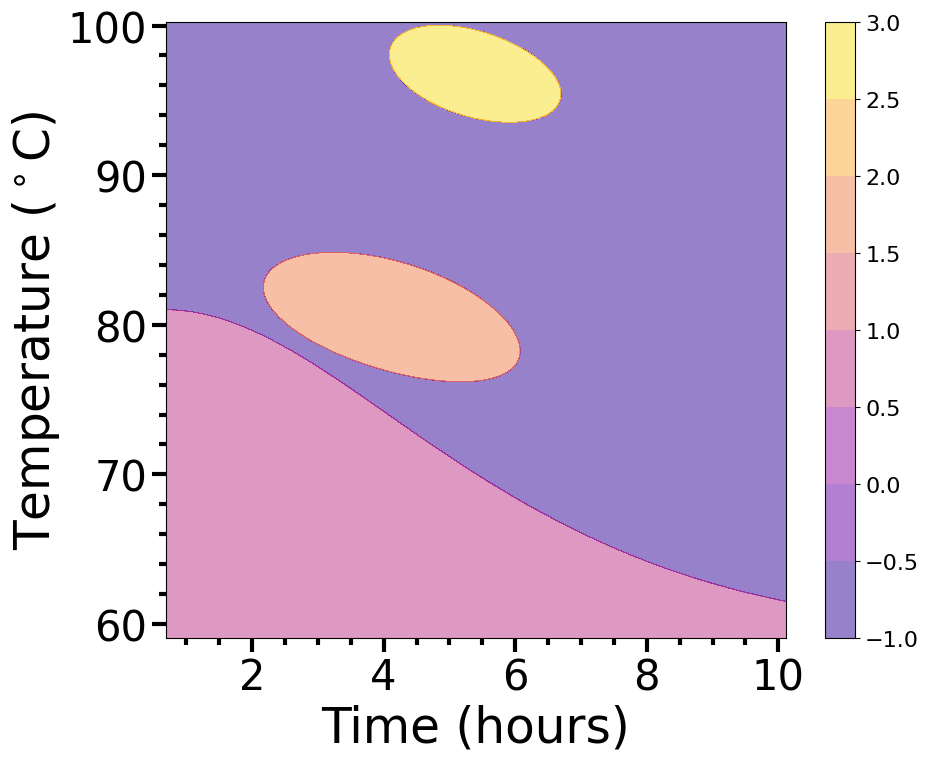

In [31]:
Z = Z.reshape(xx.shape)

plt.figure(figsize = (10,8))

fig, ax = plt.subplots(figsize = (10,8))
xx_t = xx*X.to_numpy()[:,0].std() + X.to_numpy()[:,0].mean()
yy_t = yy*X.to_numpy()[:,1].std() + X.to_numpy()[:,1].mean()
plt.contourf(xx_t, yy_t, Z, cmap=plt.cm.plasma, alpha=0.5)
plt.colorbar()
x1 = (X.to_numpy())
    
plt.xlabel('Time (hours)', fontsize= 35)
plt.ylabel('Temperature ($^\circ$C)',fontsize =35)
plt.xticks(range(2,11,2), fontsize =30)
plt.yticks(range(60,101,10), fontsize =30)
ax.tick_params(which='major', length=10,width=3)
ax.tick_params(which='minor', length=5,width=3)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.rcParams["axes.linewidth"]  =1.5

# We have saved the both the DJ and RP model using pickel.
- The fitted model for DJ is given as "DJ model SVM TCSC.sav"
- The fitted model for RP is given as "RP model SVM TCSC.sav"

In [34]:
DJ_model = pickle.load(open('DJ model SVM TCSC.sav', 'rb'))

### Example of loading the model for DJ

In [35]:
result = DJ_model.predict(np.c_[xx.ravel(), yy.ravel()])

In [36]:
Z = result

In [37]:
Z = Z.flatten()

for i in range(len(Z)):
    if Z[i] == 0:
        Z[i] =-1
    elif Z[i]==2:
        Z[i] =2.5
    elif Z[i]==1:
        Z[i] =1.5

<Figure size 1000x800 with 0 Axes>

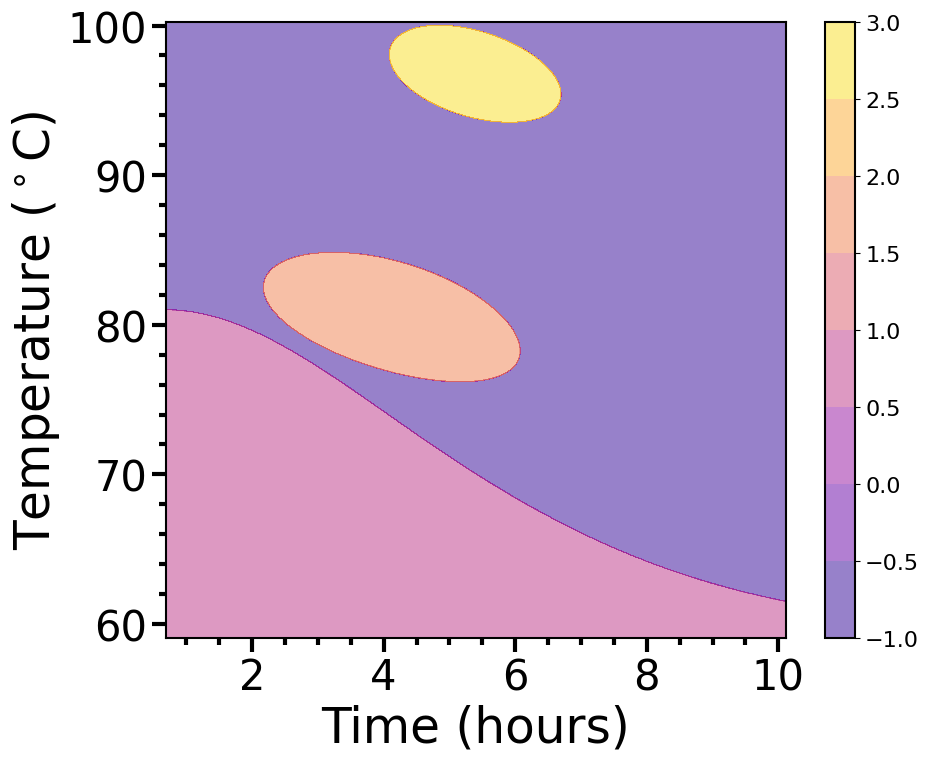

In [38]:
Z = Z.reshape(xx.shape)

plt.figure(figsize = (10,8))

fig, ax = plt.subplots(figsize = (10,8))
xx_t = xx*X.to_numpy()[:,0].std() + X.to_numpy()[:,0].mean()
yy_t = yy*X.to_numpy()[:,1].std() + X.to_numpy()[:,1].mean()
plt.contourf(xx_t, yy_t, Z, cmap=plt.cm.plasma, alpha=0.5)
plt.colorbar()
x1 = (X.to_numpy())
    
plt.xlabel('Time (hours)', fontsize= 35)
plt.ylabel('Temperature ($^\circ$C)',fontsize =35)
plt.xticks(range(2,11,2), fontsize =30)
plt.yticks(range(60,101,10), fontsize =30)
ax.tick_params(which='major', length=10,width=3)
ax.tick_params(which='minor', length=5,width=3)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.rcParams["axes.linewidth"]  =1.5

### Example of loading the model for RP

In [39]:
RP_model = pickle.load(open('RP model SVM TCSC.sav', 'rb'))

/Users/wenbinli/Documents/Jin crystal/perovskite_ml/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SVC from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/wenbinli/Documents/Jin crystal/perovskite_ml/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [40]:
result = RP_model.predict(np.c_[xx.ravel(), yy.ravel()])

In [41]:
Z = result

In [42]:
Z = Z.flatten()

for i in range(len(Z)):
    if Z[i] == 0:
        Z[i] =-1
    elif Z[i]==2:
        Z[i] =2.5
    elif Z[i]==1:
        Z[i] =1.5

<Figure size 1000x800 with 0 Axes>

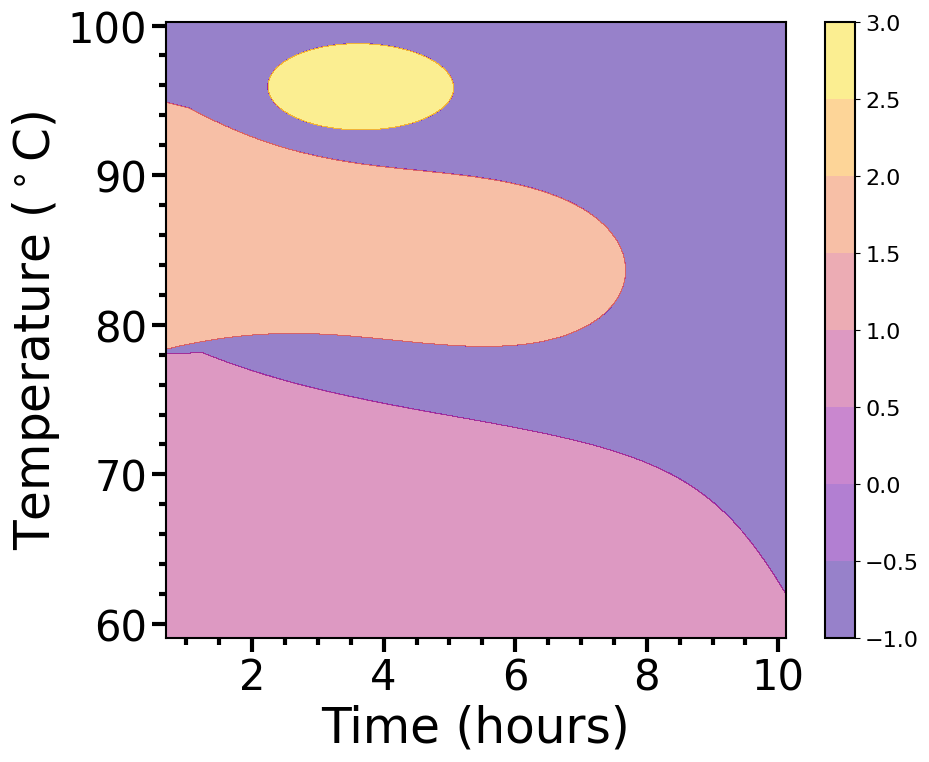

In [43]:
Z = Z.reshape(xx.shape)

plt.figure(figsize = (10,8))

fig, ax = plt.subplots(figsize = (10,8))
xx_t = xx*X.to_numpy()[:,0].std() + X.to_numpy()[:,0].mean()
yy_t = yy*X.to_numpy()[:,1].std() + X.to_numpy()[:,1].mean()
plt.contourf(xx_t, yy_t, Z, cmap=plt.cm.plasma, alpha=0.5)
plt.colorbar()
x1 = (X.to_numpy())
    
plt.xlabel('Time (hours)', fontsize= 35)
plt.ylabel('Temperature ($^\circ$C)',fontsize =35)
plt.xticks(range(2,11,2), fontsize =30)
plt.yticks(range(60,101,10), fontsize =30)
ax.tick_params(which='major', length=10,width=3)
ax.tick_params(which='minor', length=5,width=3)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.rcParams["axes.linewidth"]  =1.5